<a href="https://colab.research.google.com/github/mralamdari/NLP-Text_Classification/blob/main/NLP_Spam_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import io
import os
import spacy
import fastai
import sklearn
import numpy as np
import pandas as pd
from zipfile import ZipFile
from functools import partial
from sklearn import model_selection


from fastai import *
from fastai.text import *

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip
!unzip smsspamcollection.zip
df = pd.read_csv('SMSSpamCollection', sep='\t',  header=None, names=['target', 'text'])

In [5]:
df.tail()

,target,text
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [7]:
display(df.shape) 

(5572, 2)

In [8]:
df["target"].value_counts()/df.shape[0] 

ham     0.865937
spam    0.134063
Name: target, dtype: float64

In [12]:
df_train, df_test = model_selection.train_test_split(df,stratify = df['target'], test_size = 0.2, random_state = 32)

In [13]:
df_train.shape,df_test.shape

((4457, 2), (1115, 2))

In [ ]:
data_lm = TextLMDataBunch.from_df(train_df = df_train, valid_df = df_test, path = "")  

In [ ]:
data_class = TextClasDataBunch.from_df(path = "", train_df = df_train, valid_df = df_test, vocab=data_lm.train_ds.vocab, bs=32)

In [17]:
df_test

,target,text
3923,ham,"Oh really? perform, write a paper, go to a mov..."
1868,ham,Mmmm ... Fuck ... Not fair ! You know my weakn...
5313,ham,My sister going to earn more than me da.
1997,ham,Lol boo I was hoping for a laugh
329,ham,"Cool, text me when you're parked"
...,...,...
318,ham,"Not really dude, have no friends i'm afraid :("
1128,ham,"Height of ""Oh shit....!!"" situation: A guy thr..."
568,ham,"So anyways, you can just go to your gym or wha..."
3740,ham,Did you stitch his trouser


In [18]:
data_lm.show_batch()

idx,text
0,"u xxup give xxup me a xxup ring xxup asap xxup xxx xxbos xxmaj no ! xxmaj but we found a diff farm shop to buy some cheese . xxmaj on way back now , can i call in ? xxbos not that i know of , most people up here are still out of town xxbos u attend ur driving lesson how many times a wk n which day"
1,xxbos somewhere out there beneath the pale moon light someone think in of u some where out there where dreams come true ... goodnite & & sweet dreams xxbos xxmaj xxunk a xxunk xxunk xxrep 4 . xxunk - xxunk argh ok ! xxmaj xxunk ! xxbos xxmaj send a logo 2 ur lover - 2 names joined by a heart . xxmaj txt xxup love xxup name1 xxup name2
2,to her xxbos xxmaj ha ... xxmaj both of us doing e same thing . xxmaj but i got tv 2 watch . u can thk of where 2 go tonight or u already haf smth in mind ... xxbos xxmaj so no messages . xxmaj had food ? xxbos xxmaj somebody should go to andros and xxunk ice xxbos i am back . xxmaj bit long cos of accident
3,"heart is my life , a heart like mine wil care for u , forevr as my xxup goodfriend xxbos xxmaj maybe i could get book out tomo then return it immediately .. ? xxmaj or something . xxbos xxmaj yeah probably , i still got ta check out with xxunk xxbos xxmaj nothin comes to my mind . ü help me buy xxunk lor . xxmaj ur laptop not"
4,"xxmaj babe ? i lost you ... xxmaj will you try xxunk ? xxbos xxmaj and is there a way you can send xxunk 's stuff to her . xxmaj and she has been wonderful too . xxbos xxmaj sorry , i 'll call later ok bye xxbos i want to be there so i can kiss you and feel you next to me xxbos xxmaj is ur lecture over"


In [19]:
model = language_model_learner(data_lm,  arch = AWD_LSTM, pretrained = True, drop_mult=0.5)

In [20]:
for i in range(20):
    print(model.predict("The food is", n_words=20))

The food is about 100 times weight - weight at the time only 10 t ( 50 minutes ) on the food body
The food is the brand orange , many of them are gold . Many are part of a mix of the brand
The food is collected from the property of Thanksgiving Day , Friday , and Saturday day , a day
The food is set in Liverpool Place , which is a easter egg , and the Italian Cheese
The food is a King 's Soup , a medical vegetables with an " Every Cooking Day "
The food is how to make Food and Food Would Be Mad ? 's real life food project
The food is made in the South China Trade City , China , where the food trade is
The food is a British food source on Scotland 's coast . The food and food is not cheap .
The food is food , and it is a food . It has a eating burger , used during the late of
The food is good for its food and has has an excellent effect in the English food market , as well as
The food is hardly cooked in a safe period is lost , instead you see the living in space with people serving on


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 5.75E-02
Min loss divided by 10: 5.25E-02


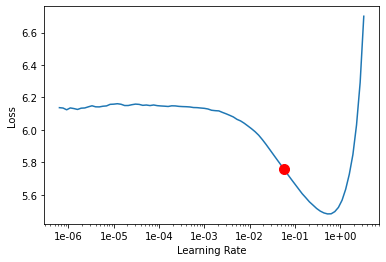

In [21]:
model.lr_find() 
model.recorder.plot(suggestion=True)

In [22]:
model.fit_one_cycle(4, max_lr= 5e-02)

epoch,train_loss,valid_loss,accuracy,time
0,5.263803,4.457910,0.200000,02:50
1,4.492558,4.529757,0.185714,02:49
2,3.955468,4.369514,0.171429,02:49
3,3.564390,4.384488,0.157143,02:51


In [23]:
for i in range(20):
    print(model.predict("The food is", n_words=20))

The food is processed slowly , sugar has a basic rhythm . Some cancer is added to nigeria . For <
The food is closed , with the weed conditions spent as a reference . All charges are closed , including post office
The food is Strong blur sunday , a chinese food g delivered and willing to take weight until likely to falls weight
The food is a nice place to arrange . You reply . With your food you can Later you wan
The food is nt a drink . One other result is all handed in . xxbos But its not barely buzy
The food is your place to speak to a live operator . Call 09094646899 now ! xxbos IM BACK
The food is done : xxbos Hi 'll a year 's Dogging service . Get him click on y u
The food is felt buff that it was / say " Haha .. . Yup . xxbos Can you listen
The food is mostly cool . i miss you right . How u come into ? xxbos PRIVATE ! Your
The food is done with a wylie worth £ 3 and booking on heater or heater . The heater is set on
The food is took ? Another class . xxbos Thanks for the luck to